<h1>Data Mining Assignment (Group 5)</h1>
<br />
<h3>Members:</h3>
<ul>
    <li><b>Aditya Virgi Adam Rasyid (202143501517)</b></li>
    <li><b>Al-Fariqy Raihan Azhwar (202143501514)</b></li>
    <li><b>Dafa Rezha Alfarizi (202143501546)</b></li>
    <li><b>Dyana Eka Putri (202143501529)</b></li>
    <li><b>Muhamad Zulfadli (202143501541)</b></li>
</ul>
<br />

<h3>Case : Memprediksi harga cryptocurrency menggunakan LSTM (Long Short Term Memory)</h3>
<br />
<p><b>Objectives :</b></p>
<ul>
  <li>
    Memprediksi harga cryptocurrency dan menentukan apakah akan naik atau turun.
  </li>
</ul>

<br />

<p><b>Attributes :</b></p>
<ul>
  <li><b>Date</b>: Tanggal ketika data dicatat. Biasanya dalam format YYYY-MM-DD (tahun-bulan-hari). Misalnya, "2024-01-01".</li>

  <li><b>Open</b>: Harga pembukaan saham pada awal periode perdagangan (misalnya, awal hari perdagangan). Ini merupakan harga pertama yang diperdagangkan ketika pasar dibuka.</li>

  <li><b>High</b>: Harga tertinggi yang dicapai saham selama periode perdagangan. Ini adalah harga tertinggi yang dicapai oleh saham pada hari tersebut.</li>

  <li><b>Low</b>: Harga terendah yang dicapai saham selama periode perdagangan. Ini adalah harga terendah yang dicapai oleh saham pada hari tersebut.</li>

  <li><b>Close</b>: Harga penutupan saham pada akhir periode perdagangan (misalnya, akhir hari perdagangan). Ini merupakan harga terakhir yang diperdagangkan ketika pasar ditutup.</li>

  <li><b>Adj Close (Adjusted Close)</b>: Harga penutupan yang telah disesuaikan untuk semua tindakan perusahaan seperti dividen, pemecahan saham (stock split), dan lainnya. Ini adalah harga yang paling akurat untuk analisis historis karena mencerminkan nilai yang lebih realistis dari saham tersebut setelah memperhitungkan berbagai penyesuaian.</li>

  <li><b>Volume</b>: Jumlah total saham yang diperdagangkan selama periode tertentu. Ini menunjukkan seberapa banyak saham yang diperdagangkan (dalam unit saham) pada hari tersebut dan bisa digunakan sebagai indikator likuiditas saham.</li>
</ul>

<br />

<h2>Data Collection</h2>

In [1]:
%%shell
set -e

REPO_URL="https://github.com/belajarqywok/cryptocurrency_prediction"
REPO_DIR="cryptocurrency_prediction"
DATASET_DIR="datasets"

if ! command -v git &> /dev/null
then
    apt install -y git
fi

if [ -d "$REPO_DIR" ]; then
    rm -rf "$REPO_DIR"
fi

git clone "$REPO_URL"

if [ -d "$DATASET_DIR" ]; then
    rm -rf "$DATASET_DIR"
fi

if [ -d "$REPO_DIR/$DATASET_DIR" ]; then
    mv "$REPO_DIR/$DATASET_DIR" .
fi

rm -rf "$REPO_DIR"
ls -al "$DATASET_DIR"

Cloning into 'cryptocurrency_prediction'...
remote: Enumerating objects: 4725, done.
remote: Counting objects: 100% (4556/4556), done.
remote: Compressing objects: 100% (1411/1411), done.
remote: Total 4725 (delta 3431), reused 4142 (delta 3120), pack-reused 169
Receiving objects: 100% (4725/4725), 316.49 MiB | 11.64 MiB/s, done.
Resolving deltas: 100% (3433/3433), done.
Updating files: 100% (296/296), done.
total 5420
drwxr-xr-x 2 root root   4096 Jun 23 10:42 .
drwxr-xr-x 1 root root   4096 Jun 23 10:42 ..
-rw-r--r-- 1 root root 159656 Jun 23 10:42 ADA-USD.csv
-rw-r--r-- 1 root root  41219 Jun 23 10:42 APT21794-USD.csv
-rw-r--r-- 1 root root  30347 Jun 23 10:42 ARB11841-USD.csv
-rw-r--r-- 1 root root 100157 Jun 23 10:42 AR-USD.csv
-rw-r--r-- 1 root root 131290 Jun 23 10:42 ATOM-USD.csv
-rw-r--r-- 1 root root  99663 Jun 23 10:42 AVAX-USD.csv
-rw-r--r-- 1 root root 185947 Jun 23 10:42 BCH-USD.csv
-rw-r--r-- 1 root root 177037 Jun 23 10:42 BNB-USD.csv
-rw-r--r-- 1 root root 152142 Jun 2

In [2]:
import os
from warnings import filterwarnings

filterwarnings('ignore')

DATASETS_PATH = './datasets'
DATASETS = sorted(
  [
    item for item in os.listdir(DATASETS_PATH)
    if os.path.isfile(os.path.join(DATASETS_PATH, item)) and item.endswith('.csv')
  ]
)

print('Datasets:')
for i in DATASETS[:10]: print(f'  - {i}')
print(f'  - and other (... {len(DATASETS) - 10})')

Datasets:
  - ADA-USD.csv
  - APT21794-USD.csv
  - AR-USD.csv
  - ARB11841-USD.csv
  - ATOM-USD.csv
  - AVAX-USD.csv
  - BCH-USD.csv
  - BNB-USD.csv
  - BTC-USD.csv
  - BTCB-USD.csv
  - and other (... 40)


In [3]:
import pandas as pd

for i in DATASETS[:10]:
  df = pd.read_csv(f'{DATASETS_PATH}/{i}')
  print(f'Head of {i}:')
  print(df.tail())
  print('\n')

Head of ADA-USD.csv:
            Date      Open      High       Low     Close  Adj Close     Volume
2414  2024-06-19  0.383565  0.397249  0.380962  0.383791   0.383791  295424813
2415  2024-06-20  0.383791  0.396790  0.379014  0.384244   0.384244  286206619
2416  2024-06-21  0.384248  0.390342  0.374608  0.376052   0.376052  272257203
2417  2024-06-22  0.376051  0.389592  0.371937  0.384812   0.384812  241766850
2418  2024-06-23  0.384794  0.390563  0.384018  0.390563   0.390563  228810128


Head of APT21794-USD.csv:
           Date      Open      High       Low     Close  Adj Close     Volume
609  2024-06-19  6.829489  7.109319  6.751914  6.891644   6.891644  153104339
610  2024-06-20  6.891644  7.158962  6.729643  6.907999   6.907999  168130290
611  2024-06-21  6.906493  7.029233  6.812755  6.937375   6.937375  144017997
612  2024-06-22  6.937681  6.938184  6.816058  6.863215   6.863215   72928164
613  2024-06-23  6.862212  6.980551  6.856907  6.966905   6.966905   67397728


Head of

<br />
<h3>sampling (Ethereum)</h3>

In [4]:
#sample
dataframe = pd.read_csv(f'{DATASETS_PATH}/ETH-USD.csv', index_col='Date')
dataframe.tail(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-06-14,3467.969971,3528.602295,3366.223877,3480.271973,3480.271973,15793876596
2024-06-15,3479.785645,3589.887451,3473.452637,3565.549561,3565.549561,12733651076
2024-06-16,3566.761963,3648.093018,3541.534424,3620.563477,3620.563477,9878388158
2024-06-17,3622.383545,3634.285400,3468.148926,3511.378906,3511.378906,17838856988
2024-06-18,3510.565186,3514.177246,3371.590332,3483.681396,3483.681396,21022514455
2024-06-19,3482.350830,3583.320068,3466.480957,3559.347412,3559.347412,15275373778
2024-06-20,3559.347412,3623.886475,3485.459961,3511.086914,3511.086914,16115123753
2024-06-21,3511.268311,3542.957275,3447.935547,3516.075684,3516.075684,15933353456
2024-06-22,3516.551270,3519.497559,3477.169922,3494.813477,3494.813477,7423703673


In [5]:
dataframe.info()
dataframe.describe(include = 'all')

<class 'pandas.core.frame.DataFrame'>
Index: 2419 entries, 2017-11-09 to 2024-06-23
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2419 non-null   float64
 1   High       2419 non-null   float64
 2   Low        2419 non-null   float64
 3   Close      2419 non-null   float64
 4   Adj Close  2419 non-null   float64
 5   Volume     2419 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 132.3+ KB


,Open,High,Low,Close,Adj Close,Volume
count,2419.000000,2419.000000,2419.000000,2419.000000,2419.000000,2.419000e+03
mean,1374.367581,1412.706739,1332.386708,1375.499080,1375.499080,1.230856e+10
std,1191.807181,1224.351161,1155.337026,1192.059729,1192.059729,1.003120e+10
min,84.279694,85.342743,82.829887,84.308296,84.308296,6.217330e+08
25%,244.145607,248.187210,236.747917,244.160736,244.160736,5.126564e+09
50%,1218.079346,1257.770020,1185.702148,1218.426758,1218.426758,9.908112e+09
75%,2058.074462,2110.714478,1998.625488,2061.309570,2061.309570,1.679948e+10
max,4810.071289,4891.704590,4718.039063,4812.087402,4812.087402,8.448291e+10


<br />
<h3>Data Cleaning</h3>

<Axes: >

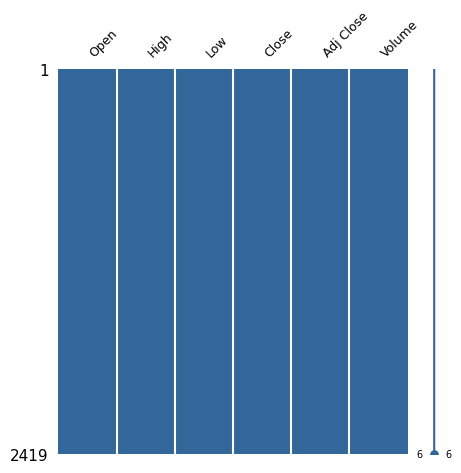

In [6]:
import missingno as msno

msno.matrix(
  dataframe,
  figsize  = (5, 5),
  fontsize = 9,
  color    = (0.2, 0.4, 0.6)
)

In [7]:
dataframe.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [8]:
for col in dataframe.columns:
  if dataframe[col].isnull().any():
    if dataframe[col].dtype == 'object':
      print(col)
      dataframe[col].fillna(dataframe[col].mode()[0], inplace = True)
    else:
      print(col)
      dataframe[col].fillna(dataframe[col].mean(), inplace = True)

In [9]:
missing_col_names = [
  col for col, _ in dataframe.to_dict().items() \
    if dataframe[col].isnull().sum() > 0
]

print(f"Result: {'There are missing values' if len(missing_col_names) > 0 else 'There are no missing values'}")

Result: There are no missing values


<br />
<h3>Data Standarization and Normalization</h3>

In [10]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

dataframe = dataframe[['Close']]

# Standarization
standard_scaler = StandardScaler()
dataframe['Close'] = standard_scaler.fit_transform(dataframe[['Close']])

# Normalization
minmax_scaler = MinMaxScaler(feature_range=(0, 1))
dataframe['Close'] = minmax_scaler.fit_transform(dataframe[['Close']])


dataframe.tail(10)

,Close
Date,
2024-06-14,0.718300
2024-06-15,0.736338
2024-06-16,0.747974
2024-06-17,0.724880
2024-06-18,0.719021
2024-06-19,0.735026
2024-06-20,0.724818
2024-06-21,0.725873
2024-06-22,0.721376


<br />
<h3>Feature Engineering</h3>

In [11]:
df.iloc[1:60+1].values

array([['2019-06-19', 9068.174805, 9277.677734, 9051.094727, 9271.459961,
        9271.459961, 131077],
       ['2019-06-20', 9271.567383, 9573.689453, 9209.416992, 9519.200195,
        9519.200195, 83052],
       ['2019-06-21', 9526.833984, 10130.935547, 9526.833984,
        10127.998047, 10127.998047, 76227],
       ['2019-06-22', 10151.890625, 11171.013672, 10083.189453,
        10719.981445, 10719.981445, 84485],
       ['2019-06-23', 10718.117188, 11293.773438, 10561.124023,
        11246.518555, 11246.518555, 52072],
       ['2019-06-24', 11246.518555, 11251.15625, 10659.144531,
        11010.517578, 11010.517578, 106205],
       ['2019-06-25', 10999.733398, 11676.888672, 10999.733398,
        11666.96582, 11666.96582, 95820],
       ['2019-06-26', 11666.96582, 13739.329102, 11631.251953,
        12827.663086, 12827.663086, 67574],
       ['2019-06-27', 12827.663086, 13022.981445, 10452.151367,
        11136.211914, 11136.211914, 117404],
       ['2019-06-28', 11152.90332, 12430.

In [12]:
df.iloc[1].values[0]

'2019-06-19'

In [28]:
import numpy as np

def create_sequences(df, seq_len) -> tuple:
  labels    = []
  sequences = []

  for i in range(len(df) - seq_len):
    seq   = df.iloc[i:(seq_len + i)].values
    label = df.iloc[seq_len + i].values[0]

    sequences.append(seq)
    labels.append(label)

  return np.array(sequences), np.array(labels)


sequence_length   = 60
sequences, labels = create_sequences(df = dataframe, seq_len = sequence_length)
print(f'Shapes: {(sequences.shape, labels.shape)}')

Shapes: ((2359, 60, 1), (2359,))


<br />
<h3>Modeling and Training</h3>

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


def build_model(input_shape):
  model = Sequential([
    LSTM(units = 50, return_sequences = True, input_shape = input_shape),
    Dropout(0.2),

    LSTM(units = 50, return_sequences = False),
    Dropout(0.2),

    Dense(units=1)
  ])

  model.compile(
    optimizer = 'adam',
    loss = 'mean_squared_error'
  )

  return model


input_shape = (sequences.shape[1], sequences.shape[2])
model = build_model(input_shape)
model.summary()


train_size      = int(len(sequences) * 0.8)
X_train, X_test = sequences[:train_size], sequences[train_size:]
y_train, y_test = labels[:train_size], labels[train_size:]

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 30651 (119.73 KB)
Trainable params: 30651 (119.73 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
early_stopping = EarlyStopping(
  monitor  = 'val_loss',
  patience = 5,
  mode     = 'min'
)

model_checkpoint = ModelCheckpoint(
  filepath       = 'ETH-USD.keras',
  save_best_only = True,
  monitor        = 'val_loss',
  mode           = 'min'
)

history = model.fit(
  X_train, y_train,
  epochs          = 200,
  batch_size      = 32,
  validation_data = (X_test, y_test),
  callbacks       = [early_stopping, model_checkpoint]
)

Epoch 1/200
59/59 [==============================] - 12s 122ms/step - loss: 0.0107 - val_loss: 0.0017
Epoch 2/200
59/59 [==============================] - 4s 72ms/step - loss: 0.0028 - val_loss: 0.0012
Epoch 3/200
59/59 [==============================] - 5s 85ms/step - loss: 0.0025 - val_loss: 0.0010
Epoch 4/200
59/59 [==============================] - 5s 85ms/step - loss: 0.0023 - val_loss: 9.8405e-04
Epoch 5/200
59/59 [==============================] - 4s 72ms/step - loss: 0.0018 - val_loss: 0.0015
Epoch 6/200
59/59 [==============================] - 5s 91ms/step - loss: 0.0022 - val_loss: 8.3344e-04
Epoch 7/200
59/59 [==============================] - 5s 79ms/step - loss: 0.0019 - val_loss: 7.8464e-04
Epoch 8/200
59/59 [==============================] - 4s 70ms/step - loss: 0.0017 - val_loss: 7.6916e-04
Epoch 9/200
59/59 [==============================] - 5s 89ms/step - loss: 0.0015 - val_loss: 9.1782e-04
Epoch 10/200
59/59 [==============================] - 5s 81ms/step - loss: 0.0

In [16]:
model.load_weights('ETH-USD.keras')
loss = model.evaluate(X_test, y_test)
predictions = model.predict(X_test)

15/15 [==============================] - 1s 20ms/step


In [17]:
import joblib

joblib.dump(minmax_scaler, 'minmax_scaler.pickle')
joblib.dump(standard_scaler, 'standard_scaler.pickle')

model.save('ETH-USD.keras')

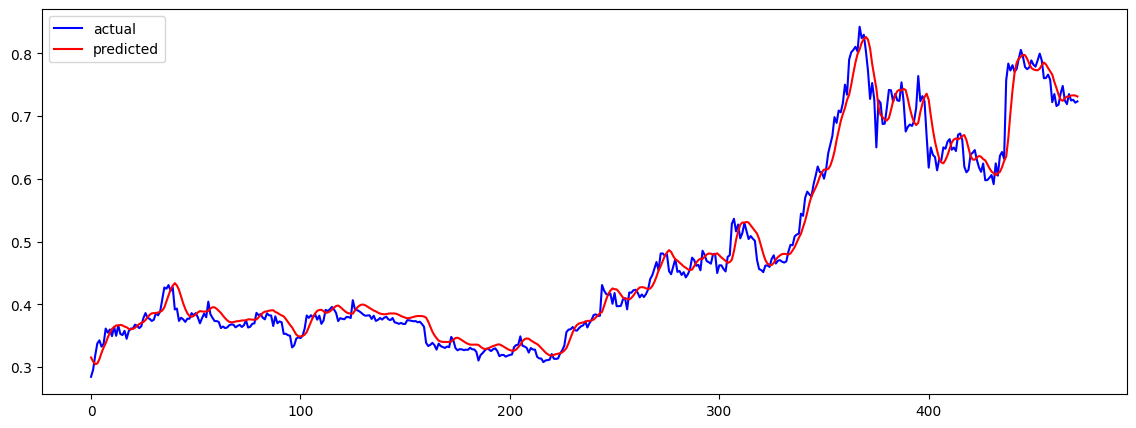

In [18]:
import matplotlib.pyplot as plt

plt.figure(
  figsize = (14, 5)
)

plt.plot(y_test, color = 'blue', label = 'actual')
plt.plot(predictions, color = 'red', label = 'predicted')
plt.legend()
plt.show()

<br />
<h3>Testing</h3>

In [19]:
from tensorflow.keras.models import load_model

model = load_model('ETH-USD.keras')
minmax_scaler = joblib.load('minmax_scaler.pickle')
standard_scaler = joblib.load('standard_scaler.pickle')

days = 7

lst_seq = dataframe[-sequence_length:].values
lst_seq = np.expand_dims(lst_seq, axis = 0)

predicted_prices = {}
last_date = pd.to_datetime(dataframe.index[-1])

for _ in range(days):
  predicted_price = model.predict(lst_seq)
  last_date       = last_date + pd.Timedelta(days = 1)

  predicted_prices[last_date] = minmax_scaler.inverse_transform(predicted_price)
  predicted_prices[last_date] = standard_scaler.inverse_transform(predicted_prices[last_date])

  lst_seq = np.append(lst_seq[:, 1:, :], [predicted_price], axis = 1)


eth_prices = minmax_scaler.inverse_transform(dataframe[['Close']])
eth_prices = standard_scaler.inverse_transform(eth_prices)

1/1 [==============================] - 0s 42ms/step


In [20]:
print({
    'Date': dataframe[-sequence_length:].index.tolist(),
    'Close': [ _[0] for _ in eth_prices[-sequence_length:].tolist() ]
})

{'Date': ['2024-04-25', '2024-04-26', '2024-04-27', '2024-04-28', '2024-04-29', '2024-04-30', '2024-05-01', '2024-05-02', '2024-05-03', '2024-05-04', '2024-05-05', '2024-05-06', '2024-05-07', '2024-05-08', '2024-05-09', '2024-05-10', '2024-05-11', '2024-05-12', '2024-05-13', '2024-05-14', '2024-05-15', '2024-05-16', '2024-05-17', '2024-05-18', '2024-05-19', '2024-05-20', '2024-05-21', '2024-05-22', '2024-05-23', '2024-05-24', '2024-05-25', '2024-05-26', '2024-05-27', '2024-05-28', '2024-05-29', '2024-05-30', '2024-05-31', '2024-06-01', '2024-06-02', '2024-06-03', '2024-06-04', '2024-06-05', '2024-06-06', '2024-06-07', '2024-06-08', '2024-06-09', '2024-06-10', '2024-06-11', '2024-06-12', '2024-06-13', '2024-06-14', '2024-06-15', '2024-06-16', '2024-06-17', '2024-06-18', '2024-06-19', '2024-06-20', '2024-06-21', '2024-06-22', '2024-06-23'], 'Close': [3156.509521, 3130.164795, 3252.168213, 3262.7746579999994, 3215.4289549999994, 3012.286865, 2969.7846680000002, 2988.168457, 3103.541991999

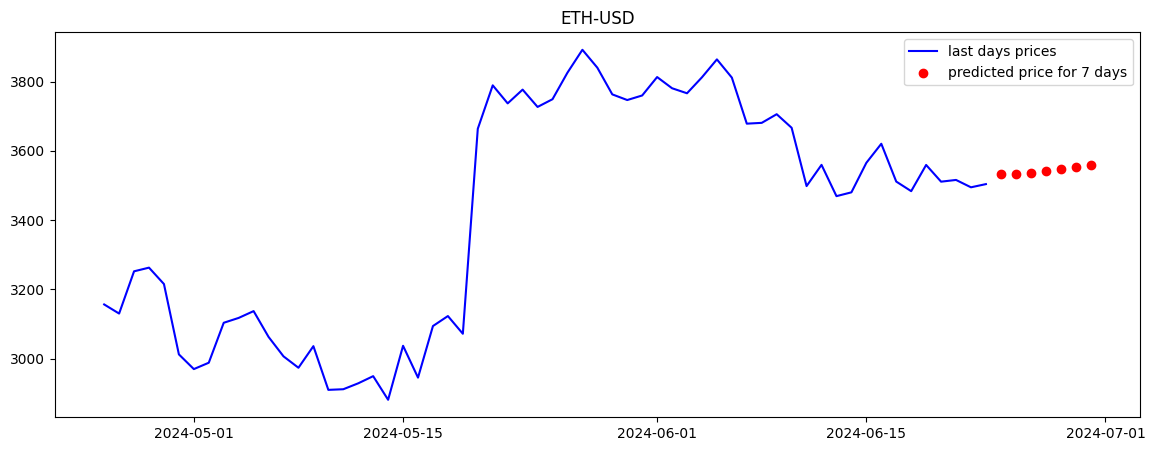

In [21]:
plt.figure(
  figsize = (14, 5)
)

plt.plot(
  pd.to_datetime(dataframe.index[-sequence_length:]),
  eth_prices[-sequence_length:],
  color = 'blue',
  label = 'last days prices'
)

plt.scatter(
  predicted_prices.keys(),
  predicted_prices.values(),
  color = 'red',
  label = f'predicted price for {days} days'
)

plt.title('ETH-USD')
plt.legend()
plt.show()

<br />
<h3>Utility Development (to be consumed by REST API Service)</h3>

In [22]:
import json

dataframe_date = dataframe.index.tolist()
dataframe_close = dataframe['Close'].tolist()
dataframe_json = {
  'Date': dataframe_date,
  'Close': dataframe_close
}

with open('ETH-USD-posttrained.json', 'w') as f:
  json.dump(dataframe_json, f)

In [23]:
for timestamp in list(predicted_prices.keys()):
  formatted_date = timestamp.strftime('%Y-%m-%d')
  dataframe_json['Date'].append(formatted_date)

for value in list(predicted_prices.values()):
  prediction_value = float(value)
  dataframe_json['Close'].append(prediction_value)

df_loaded = pd.DataFrame(dataframe_json)
df_loaded.set_index('Date', inplace=True)
df_loaded.tail(10)

,Close
Date,
2024-06-21,0.725873
2024-06-22,0.721376
2024-06-23,0.723325
2024-06-24,3533.773682
2024-06-25,3533.459717
2024-06-26,3536.406738
2024-06-27,3541.040527
2024-06-28,3546.467773
2024-06-29,3552.183594


In [24]:
dataframe[-10:].index.values.tolist()

['2024-06-14',
 '2024-06-15',
 '2024-06-16',
 '2024-06-17',
 '2024-06-18',
 '2024-06-19',
 '2024-06-20',
 '2024-06-21',
 '2024-06-22',
 '2024-06-23']

In [25]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import load_model

class Utilities:
    @staticmethod
    def cryptocurrency_prediction(days: int, sequence_length: int, model_name: str) -> dict:
        model_path = f'./{model_name}.keras'
        model = load_model(model_path)

        dataframe = pd.read_json(f'./{model_name}-posttrained.json')
        dataframe.set_index('Date', inplace=True)

        minmax_scaler = joblib.load('minmax_scaler.pickle')
        standard_scaler = joblib.load('standard_scaler.pickle')

        lst_seq = dataframe[-sequence_length:].values
        lst_seq = np.expand_dims(lst_seq, axis = 0)

        # Predicted
        predicted_prices = {}
        last_date = pd.to_datetime(dataframe.index[-1])

        for _ in range(days):
          predicted_price = model.predict(lst_seq)
          last_date       = last_date + pd.Timedelta(days = 1)

          predicted_prices[last_date] = minmax_scaler.inverse_transform(predicted_price)
          predicted_prices[last_date] = standard_scaler.inverse_transform(predicted_prices[last_date])

          lst_seq = np.append(lst_seq[:, 1:, :], [predicted_price], axis = 1)

        predicted = [
            {'date': date.strftime('%Y-%m-%d'), 'price': float(price)} \
            for date, price in predicted_prices.items()
        ]

        # Actual
        df_date = dataframe.index[-sequence_length:].values
        df_date = [pd.to_datetime(date) for date in df_date]

        dataframe[['Close']] = minmax_scaler.inverse_transform(dataframe)
        dataframe[['Close']] = standard_scaler.inverse_transform(dataframe)
        df_close = dataframe.iloc[-sequence_length:]['Close'].values
        actual = [
            {'date': date.strftime('%Y-%m-%d'), 'price': close} \
            for date, close in zip(df_date, df_close)
        ]

        return actual, predicted

In [26]:
util = Utilities()
actual, predicted = util.cryptocurrency_prediction(
    days            = 7,
    model_name      = 'ETH-USD',
    sequence_length = 60
)

1/1 [==============================] - 0s 34ms/step


In [27]:
print({ 'actual': actual, 'predicted': predicted })

{'actual': [{'date': '2024-04-25', 'price': 3156.509520999997}, {'date': '2024-04-26', 'price': 3130.1647949999965}, {'date': '2024-04-27', 'price': 3252.1682129999995}, {'date': '2024-04-28', 'price': 3262.7746579999966}, {'date': '2024-04-29', 'price': 3215.4289549999985}, {'date': '2024-04-30', 'price': 3012.286864999999}, {'date': '2024-05-01', 'price': 2969.7846679999984}, {'date': '2024-05-02', 'price': 2988.168456999999}, {'date': '2024-05-03', 'price': 3103.541991999996}, {'date': '2024-05-04', 'price': 3117.576416}, {'date': '2024-05-05', 'price': 3137.2490229999994}, {'date': '2024-05-06', 'price': 3062.72876}, {'date': '2024-05-07', 'price': 3006.577148}, {'date': '2024-05-08', 'price': 2973.657227}, {'date': '2024-05-09', 'price': 3036.020507999998}, {'date': '2024-05-10', 'price': 2909.791259999998}, {'date': '2024-05-11', 'price': 2911.602051}, {'date': '2024-05-12', 'price': 2928.7019039999996}, {'date': '2024-05-13', 'price': 2949.359618999998}, {'date': '2024-05-14', '